## Exploring confounding variables

In [19]:
import plotnine as p9
import pandas as pd
import scipy.stats as stats
import numpy as np

In [20]:
data = pd.read_csv('olyathswim.csv')
athletes = data[(data['Team'] == 'Ethiopia') | (data['Team'] == 'Australia')]

/Users/xingkaiwu/miniforge3/envs/tf/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 345 rows containing non-finite values.


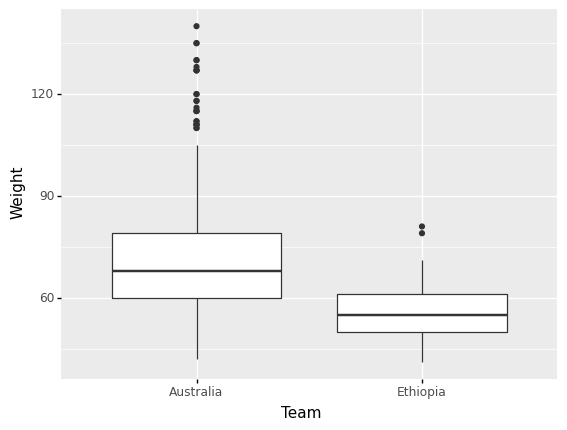

/Users/xingkaiwu/miniforge3/envs/tf/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 345 rows containing non-finite values.


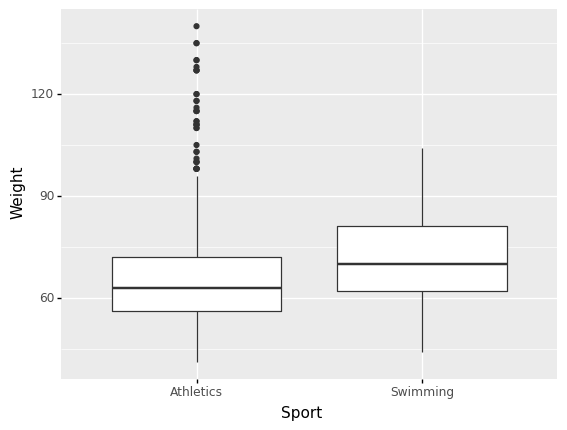


Sport      Athletics  Swimming
Team                          
Australia        993      1235
Ethiopia         289         4


In [21]:
# Create boxplot of Team versus Weight
plotTeamVWeight = p9.ggplot(athletes)+ p9.aes('Team','Weight')+ p9.geom_boxplot()

# Create boxplot of Sport versus Weight
plotSportVWeight = p9.ggplot(athletes)+ p9.aes('Sport','Weight')+ p9.geom_boxplot()
      
# Print plots 
print(plotTeamVWeight, plotSportVWeight)

# Create crosstabulation & print table
table = pd.crosstab(athletes.Team,athletes.Sport)
print(table)

## Finding confounding variables

In [39]:
data = pd.read_csv('undata_country_profile_variables.csv')
euas = ['SouthernEurope','NorthernEurope','EasternEurope','WesternEurope','WesternAsia','SouthernAsia','EasternAsia','EasternAsia']
euasdata = data[data['Region'].isin(euas)]
euasdata = euasdata[euasdata['country']!='Holy See']
euasdata['Continent'] = euasdata['Region'].map(lambda x: 'Asia' if (x.find('Asia')!= -1) else 'Europe')
euasdata=euasdata[(euasdata['Life expectancy at birth (females/males, years)'].isna()!=True) & (euasdata['GDP per capita (current US$)'].isna()!=True)]
euasdata['f_Life_exp'] = euasdata['Life expectancy at birth (females/males, years)'].str.split('/').str[0]
euasdata['f_Life_exp']=euasdata['f_Life_exp'].astype('float')
euasdata['Unemployment (% of labour force)'] = euasdata['Unemployment (% of labour force)'].astype('float')

In [33]:
euasdata

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Continent,f_Life_exp
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270.0,-2.4,623.2,23.3,...,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,NaN,Asia,63.5
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541.0,2.6,3984.2,22.4,...,28.2,5.7/2.0,84.0,36.0,94.9/95.2,95.5/90.2,2.96,NaN,Europe,79.9
9,Armenia,WesternAsia,29743,2930,102.9,88.8,10529.0,3,3489.1,19,...,11.7,5.5/1.8,48.0,46.0,100.0/100.0,96.2/78.2,3.17,NaN,Asia,77.0
12,Austria,WesternEurope,83871,8736,106.0,96.2,376967.0,1,44117.7,1.3,...,46.9,58.7/6.9,505.0,158.0,100.0/100.0,100.0/100.0,NaN,NaN,Europe,83.5
13,Azerbaijan,WesternAsia,86600,9828,118.9,99.3,53049.0,0.7,5438.7,6.7,...,13.5,37.5/3.9,2459.0,61.0,94.7/77.8,91.6/86.6,0.14,NaN,Asia,74.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Turkey,WesternAsia,783562,80745,104.9,97.0,717888.0,4,9125.8,8.6,...,15.1,346.0/4.5,1303.0,65.0,100.0/100.0,98.3/85.5,0.3,NaN,Asia,78.1
213,Ukraine,EasternEurope,603500,44223,76.3,86.0,90615.0,-9.9,2021.6,14,...,16.6,227.3/5.1,3203.0,98.0,95.5/97.8,97.4/92.6,1.63,NaN,Europe,76.0
214,United Arab Emirates,WesternAsia,83600,9400,112.4,262.4,370296.0,3.8,40438.8,0.7,...,3.8,211.4/23.2,8642.0,366.0,99.6/100.0,98.0/95.2,NaN,NaN,Asia,78.2
215,United Kingdom,NorthernEurope,242495,66182,273.6,97.4,2858003.0,2.2,44162.4,0.7,...,12.9,419.8/6.5,4482.0,116.0,100.0/100.0,99.1/99.6,NaN,NaN,Europe,82.8


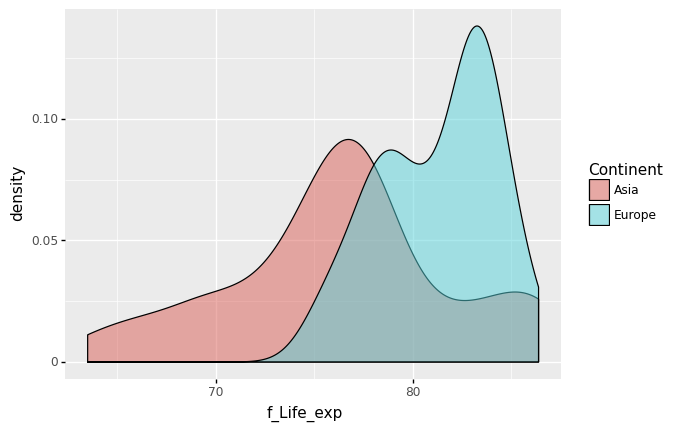

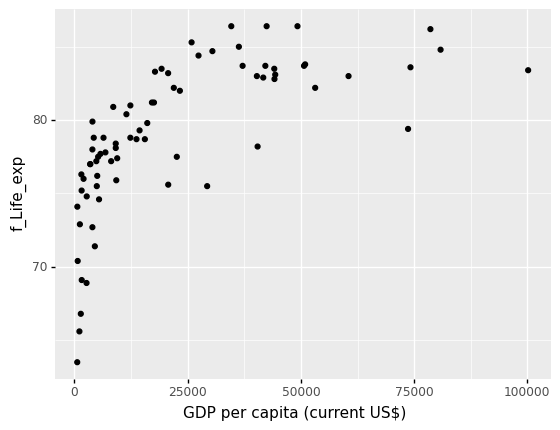

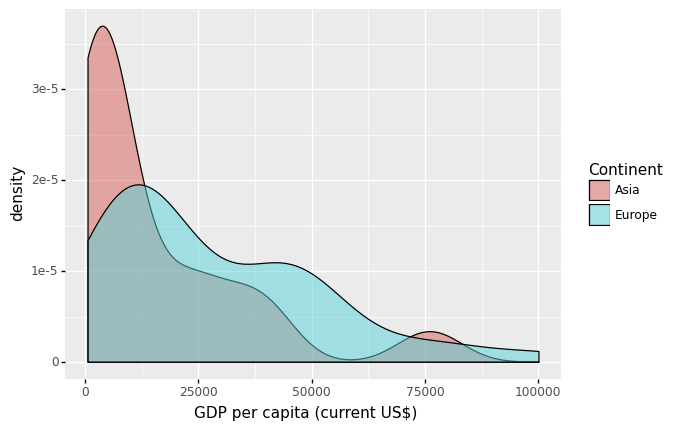

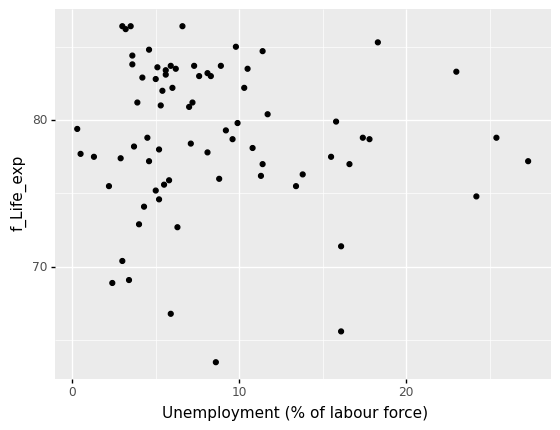

In [40]:
# Life expectancy density plot
plotLifeVCont = p9.ggplot(euasdata) + p9.aes(x='f_Life_exp', fill='Continent') +p9.geom_density(alpha=0.5)

# GDP vs life expectancy scatter plot
plotGDPVLife = p9.ggplot(euasdata) + p9.aes(x='GDP per capita (current US$)', y='f_Life_exp') +p9.geom_point()

# GDP density plot
plotGDPVCont = p9.ggplot(euasdata) + p9.aes(x='GDP per capita (current US$)', fill='Continent') +p9.geom_density(alpha=0.5)

# Unemployment vs life expectancy sctter plot
plotUMPVLife = p9.ggplot(euasdata) + p9.aes(x="Unemployment (% of labour force)", y='f_Life_exp') +p9.geom_point()

# Print plots
print(plotLifeVCont,plotGDPVLife,plotGDPVCont,plotUMPVLife)